In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Logistic Regression Class (WORK IN PROGRESS MAKING IT MULTI-CLASSIFYING):


In [4]:
def logisticX(X):
    """
    Input:
        The features classes as a matrix of the  with shape (N,p-1)
    Ouput:
        The design matrix used in logistic regression with shape 
    Add 1s to the matrix of the features as the first column.
    """
    ONE = np.ones((X.shape[0])).reshape(X.shape[0],1)
    X = np.concatenate((ONE, X), axis=1)
    
    return X

# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector


In [5]:
def softmax(X):
    return np.exp(X-np.max(X))/np.sum(np.exp(X-np.max(X)))
def sigmoid(x):
    # Numerical stability implemented by using different algebraic definitions
    # for positive or negative values 
    return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))


class logisticmulticlass(object):
    
    def __init__(self, X, y, optimizer, learning_rate= 0.01, batch_size = 32, max_epoch=100):
        
        self.X = X
        self.y = y
        self.C = y.shape[1]
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epoch = max_epoch
    @staticmethod  
    def compute_cost(X, y, beta, verbose=0):
        # Computing the cost function 
        C = beta.shape[1]
        N = X.shape[0]
        cost = np.sum( np.multiply(y,X.dot(beta))-np.log(np.ones((N,C))+np.exp(X.dot(beta)) ))/N
        return cost

    def fit(self,X,y):
        # Initializing beta as a matrix, where each row is corresponding to a model defining that class.        
        self.beta = np.random.normal(0, 1, size=(X.shape[1], y.shape[1]))/y.shape[1]
        
        # Intializing the cost  
        self.costs = []
        
        # Create randomized index for the batches
        N = X.shape[0] 
        idx = np.arange(0,N)
        
        for epoch in range(self.max_epoch):
            # Randomizing the data for each epoch
            np.random.shuffle(idx)
            X = X[idx,:]
            y = y[idx,:]

            for i in range(0, N, self.batch_size):
                
                X_batch = X[i:i+self.batch_size,:]
                y_batch = y[i:i+self.batch_size,:]
                for c in range(0, self.C):
                    
                    # Batch prediction 
                    y_batch_pred = sigmoid(X_batch.dot(self.beta[:,c]))

                    # Calculating the gradient 
                    gradient = -X_batch.T.dot(y_batch[:,c]-y_batch_pred)

                    # Updating Beta
                    self.beta[:,c] -= self.learning_rate*gradient 

            # Computing the cost after each epoch storing it 
            cost = self.compute_cost(X, y, self.beta)
            self.costs.append(cost)
        return self
    
    def predict(self,X):
        self.y_pred = sigmoid(X.dot(self.beta))
        return self.y_pred

# Loading and preparing the dataset:

In [6]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

# Ravel the image so that each of the pixels is treated as an explanatory variable (/feature)
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)

# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)




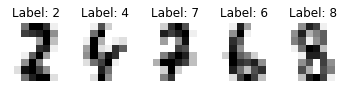

In [7]:
# Example of dataset with given labels
for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()


In [10]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


In [11]:
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating and fitting the multi-class logistic model:

In [14]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



max_epoch = 100
batch_size = 32
learning_rate = 0.001
MULTI = fn.logisticmulticlass(X, Y, optimizer=["SGD"],
                            learning_rate = learning_rate, 
                            batch_size = batch_size,
                            max_epoch=max_epoch)
MULTI.fit(X_train_scaled, Y_train)
Y_tilde = MULTI.predict(X_train_scaled)
Y_pred = MULTI.predict(X_test_scaled)


In [15]:
MULTI.fit(X_train_scaled, Y_train)

In [16]:
Y_tilde = MULTI.predict(X_train_scaled)
Y_pred = MULTI.predict(X_test_scaled)

# Evalutaing the accuracy

In [17]:
def accuracy(y,y_pred):
    y = np.argmax(y, axis=1) #Returns one-hot encoded vectors back to class integers
    y_pred = np.argmax(y_pred, axis=1)
    acc = np.sum(y==y_pred)/len(y)
    return acc

In [18]:
trainAcc = accuracy(Y_train, Y_tilde)
testAcc = accuracy(Y_test, Y_pred)
print("The Training accuracy of the multinomial logistic regression was: ", trainAcc)
print("The Test accuracy of the multinomial logistic regression was: ", testAcc)

The Training accuracy of the multinomial logistic regression was:  0.9276270006958942
The Test accuracy of the multinomial logistic regression was:  0.9111111111111111


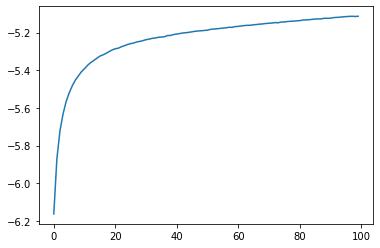

In [19]:
plt.plot(MULTI.costs)

# Below is an interesting visualization of the logistic regression. 
## A loop over all the classes estimates the probability that the number is a 0, 1, 2,... etc.
## For some numbers, it keeps a high probability for the number given, say X[3], is either a 1, 3 or an 8.
## By evaluating the accuracy for the model using np.argmax, i.e. resulting in giving the highest probability "winner takes all", we can get a high value of correct guesses - but the model is not very certain this actually is the number as it also have 98 and 93 probabilities for two other numbers.
## The provedence for this uncertainty can be resulted from the fact that the gradient is only updated for the given class at question. That is to say, under training, if the image the algorithm sees is a 3, it will only tweak the probability of it being a 3. If the model think it is a 9, it will not change the probability it is a 9. 
## But as the probability is only changed for desired output, we can argue that taking the highest value is sufficient.

In [28]:
import FunctionsLibrary as fn
print(fn.softmax(X[2].reshape(64,-1).T.dot(MULTI.beta)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


3


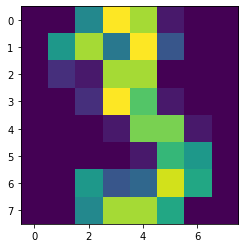

In [408]:
plt.imshow(X[3].reshape(8,8))
print(np.argmax(Y[3]))

# Logistic regression for binary

In [127]:
class LogisticRegression(object):
    
    def __init__(self, X, y, optimizer, learning_rate= 0.01, batch_size = 32, max_epoch=100):
        
        self.X = X
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        
    @staticmethod
    def sigmoid(X, derivative=False):
        if derivative == False:
            out = 1 / (1 + np.exp(-np.array(X)))
        elif derivative == True:
            s = 1 / (1 + np.exp(-np.array(X)))
            out = s*(1-s)
        return out
    
    @staticmethod  
    def compute_cost(X, y, beta):
        # Computing the cost fucntion to see the how the effect of the learning_rate and the optimizer
        
        # Cross Entropy Cost Function BINARY
        cost = -np.sum( y.dot(X.dot(beta))-np.log(np.ones(len(X))+np.exp(X.dot(beta))))
        
        # Cost function for mutlticlass logistic regression
        cost = -y.dot(np.log(softmax(X.dot(beta))))
        
        
        
        return cost
    
    @staticmethod      
    def accuracy(y,y_pred):
        acc = np.sum(y==np.round(y_pred))/len(y)
        return acc
    
    @staticmethod
    def softmax(X, derivative=False):
        # Softmax activation function
        # Returns two outputs:
        #   out[ind] : which is the maximum value
        #   ind      : which is the index of the maximum value (one hot index)
        if derivative == True:
            out = np.exp(X)/np.sum(np.exp(X))
        elif derivative == True:
            out = np.exp(X)/np.sum(np.exp(X))-1 
        # Out[ind] gives the first (if there are two equal value guesses), maximum value
        # of the softmax function.
        return out

    def fit(self,X,y):
        # Initializing beta 
        self.beta = np.random.standard_normal(X.shape[1])
        #self.beta = np.random.randn(0,1,size=(X.shape[1]))
        
        # Intializing the cost  
        self.costs = []
        
        # Initializing the iterations
        self.iter_no = 0
        # Creatie randomized index for the batches
        M = X.shape[0] # This is amount of datapoitns (??)
        idx = np.arange(0,M)
        
        for epoch in range(self.max_epoch):
            # Randomizing the data for each epoch
            np.random.shuffle(idx)
            X = X[idx,:]
            y = y[idx]
            
            for i in range(0, M, self.batch_size):
                self.iter_no = self.iter_no + i
                
                X_batch = X[i:i+self.batch_size,:]
                y_batch = y[i:i+self.batch_size]
                
                
                
                # Calculating the gradient
                gradient = -X_batch.T.dot(y_batch-LogisticRegression.sigmoid(X_batch.dot(self.beta)))
                
                # Updating Beta
                self.beta -= self.learning_rate*gradient 
                

            # Computing the cost after each epoch storing it (interesting to see with the different optimizers)
            #print(y.shape, X.shape, self.beta.shape)
            cost = self.compute_cost(X, y, self.beta)
            self.costs.append(cost)
        return self
    
    def predict(self,X):
        y_pred = LogisticRegression.sigmoid(X.dot(self.beta))
        return y_pred

In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [158]:
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [196]:
to_categorical_numpy(y_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [159]:
max_epoch = 1000
batch_size = 10
learning_rate = 0.05
logreg = LogisticRegression(X_train_scaled, y_train, optimizer=["SGD"],
                            learning_rate= learning_rate, batch_size = batch_size, max_epoch=max_epoch)

In [160]:
logreg.fit(X_train_scaled, y_train)

In [161]:
costlog=logreg.costs
print(len(costlog))

1000


In [162]:
max_epoch-np.sum(np.isnan(costlog))

1000

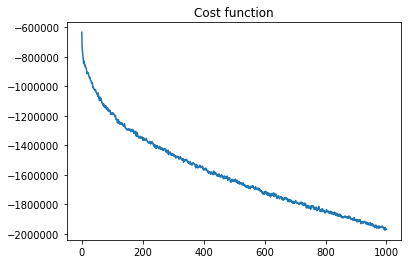

In [163]:
import matplotlib.pyplot as plt
plt.plot(np.arange(max_epoch),costlog)
plt.title("Cost function")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [171]:
y_tilde = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)

In [169]:
def accuracy(y,y_pred):
    acc = np.sum(y==np.round(y_pred))/len(y)
    return acc

In [170]:
accuracy(y_test, y_pred)

0.9370629370629371

In [174]:
accuracy(y_train, y_tilde)

0.9906103286384976

In [194]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# The maximum likelihood for the data set $D$ given the parameter $\hat{\beta}$
$P(D|\hat{\beta}) = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}$

# The cost function for logistic regression is given as the negative log of the MLE
# $\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\hat{\beta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\hat{\beta}))\right]\right)$
# And its derivative (in vector notation):
# $\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right) $


# Loading the MNIST data base
## There are 1797 images of size 8x8 pixels in "grayscale"

In [175]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

"""
for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()
"""

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


'\nfor i, image in enumerate(digits.images[random_indices]):\n    plt.subplot(1, 5, i+1)\n    plt.axis(\'off\')\n    plt.imshow(image, cmap=plt.cm.gray_r, interpolation=\'nearest\')\n    plt.title("Label: %d" % digits.target[random_indices[i]])\nplt.show()\n'

In [176]:
X_train, X_test, Y_train, Y_tes = train_test_split(inputs, labels, test_size = 0.2)

In [177]:
print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

Number of training images: 1437
Number of test images: 360


In [179]:
# One-hot in numpy (from lecture notes week 41)
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector


In [182]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [192]:
to_categorical_numpy(labels)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])